In [23]:
# 1.	Import the necessary libraries (numpy, pandas, scikit-learn packages metrics and clustering)
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import recall_score, confusion_matrix, roc_auc_score
import pickle
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("reg.csv")


In [3]:
data

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,450,Surf City,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,451,Dilemma,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,452,It's Gonna Be Me,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [5]:
data.head(15)

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
5,6,Grenade,Bruno Mars,pop,2010,110,56,71,-7,12,23,223,15,6,74
6,7,No Time,The Guess Who,album rock,1971,128,48,48,-14,5,12,219,8,6,44
7,8,End Of The Road,Boyz II Men,boy band,1991,150,43,64,-9,6,53,351,7,2,71
8,9,Someone Elses Roses,Joan Regan,NaN,2019,100,14,29,-10,15,32,143,89,3,34
9,10,You Belong to My Heart,Timi Yuro,adult standards,2013,108,39,46,-10,16,50,126,82,3,35


In [6]:
pd.isnull(data).sum()

Id            0
title         0
artist        0
top genre    15
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [14]:
#Step1: handling Missing Values

In [7]:
missing_values = ["N/a","na",np.nan]
data = pd.read_csv("reg.csv",na_values=missing_values)

In [8]:
#Step 2: Remove the Null values

In [9]:
data.dropna(how="all")

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,450,Surf City,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,451,Dilemma,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,452,It's Gonna Be Me,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62


In [10]:
data.dropna()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
5,6,Grenade,Bruno Mars,pop,2010,110,56,71,-7,12,23,223,15,6,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,450,Surf City,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,451,Dilemma,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,452,It's Gonna Be Me,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62


In [11]:
# Dropping the column title which have more unique values

In [12]:
df = data.drop(columns=['title'])

In [13]:
df.head()

,Id,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [14]:
#Checking out the data

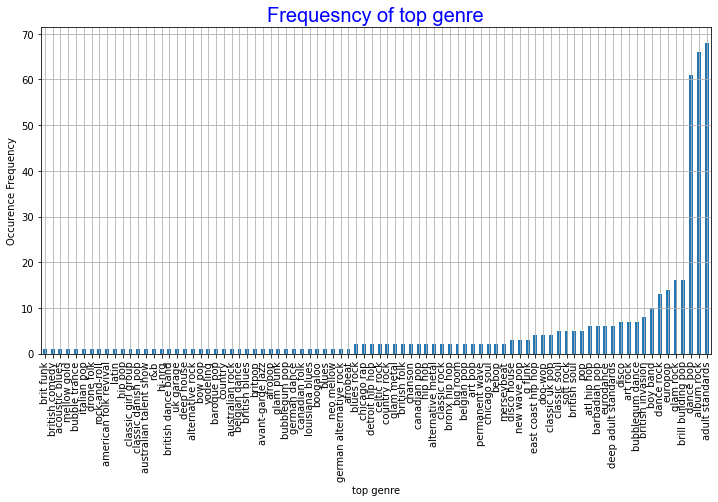

In [15]:

#Frequency variation
data['top genre'].value_counts().sort_values().plot(kind='bar', figsize=(12,6))
plt.xlabel("top genre")
plt.ylabel("Occurence Frequency")
f1 = {'family':'arial' ,'color' : 'blue' ,'size':20}
plt.title('Frequesncy of top genre', fontdict = f1)
plt.grid()
plt.show()

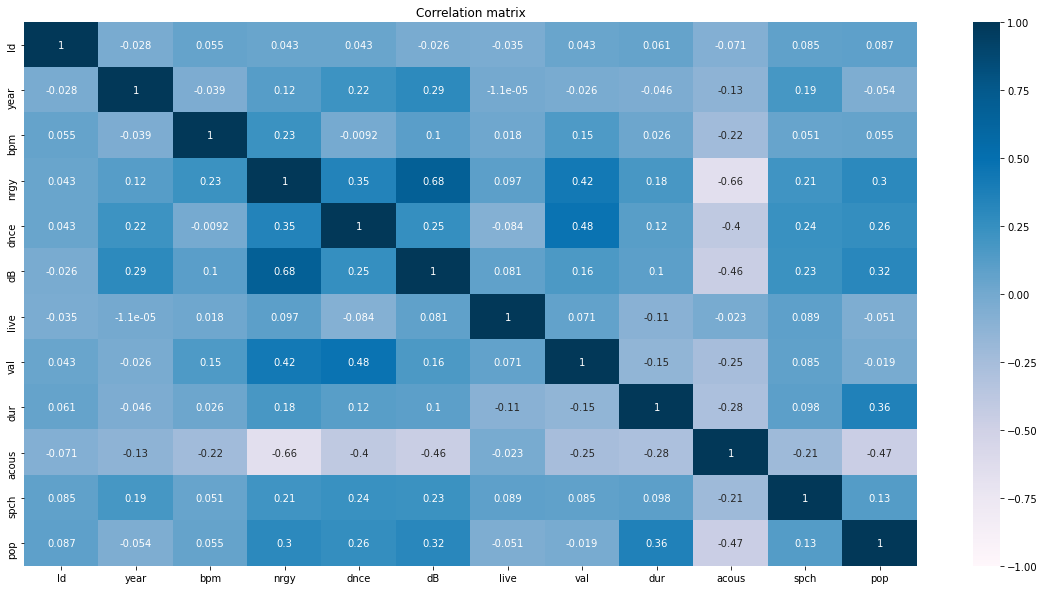

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='PuBu', vmin=-1, ax=ax)
plt.title('Correlation matrix')
plt.show()

In [17]:
#Encoding the categorical data into numerical data

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['top genre']=le.fit_transform(df['top genre'])
df['artist']=le.fit_transform(df['artist'])
df.head()


,Id,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,56,1,1996,107,31,45,-8,13,28,150,75,3,44
1,2,306,86,2011,114,44,53,-8,13,47,139,49,3,37
2,3,20,1,1979,105,36,63,-9,13,67,245,11,3,77
3,4,19,1,1980,170,28,47,-16,13,33,232,25,3,67
4,5,94,68,1973,121,47,56,-8,15,40,193,45,3,63


In [19]:
#Spliting of dataset
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
print(Y)


0      44
1      37
2      77
3      67
4      63
       ..
448    45
449    50
450    77
451    62
452    59
Name: pop, Length: 453, dtype: int64


In [20]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.20)

In [29]:
print("LOGISTIC REGRESSION")
print("**************************************")
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train, Y_train)
lm.predict_proba(X_test)
predicted = lm.predict(X_test)
print(metrics.classification_report(Y_test, predicted))
mse = mean_squared_error(Y_test,predicted)
rmse = np.sqrt(mse)

print("Root mean square error:",rmse)
print("Mean absolute error:",mean_absolute_error(Y_test,predicted))
print("Mean absolute percentage error", mean_absolute_percentage_error(Y_test,predicted))



LOGISTIC REGRESSION
**************************************
              precision    recall  f1-score   support

          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         2
          39       0.50      1.00      0.67         1
          40       0.00      0.00      0.00         0
          41       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         0
          46       0.00      0.00      0.00         3
          47       0.00      0.00      0.00         2
          48       0.0

LINEAR REGRESSION
**************************************
Root mean square error: 11.935014072534587
Mean absolute error: 9.48809270490591
Mean absolute percentage error 0.17868276602856206
Coefficients:  [ 0.0074567  -0.00352119 -0.01361458 -0.17530449 -0.02656566 -0.07257116
  0.18956195  1.1806537  -0.02999292 -0.08483194  0.03617049 -0.15435566
 -0.0484642 ]
Variance score: 0.20779309320385686


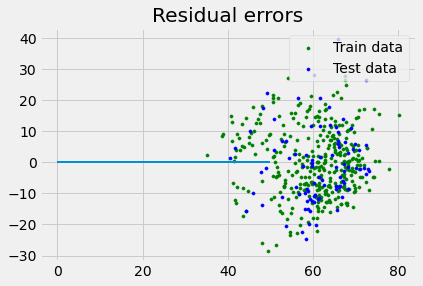

In [33]:
from sklearn import datasets, linear_model, metrics
print("LINEAR REGRESSION")
print("**************************************")
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, Y_train)

predicted = reg.predict(X_test)
mse = mean_squared_error(Y_test,predicted)
rmse = np.sqrt(mse)

print("Root mean square error:",rmse)
print("Mean absolute error:",mean_absolute_error(Y_test,predicted))
print("Mean absolute percentage error", mean_absolute_percentage_error(Y_test,predicted))
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, Y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - Y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - Y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [49]:
print("\n\nDecision Tree")
print("**************************************")
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
#model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, Y_train)
print(model)
predicted = model.predict(X_test)
print(metrics.classification_report(Y_test, predicted))
print(metrics.confusion_matrix(Y_test, predicted))



Decision Tree
**************************************
DecisionTreeClassifier()
              precision    recall  f1-score   support

          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         3
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         0
          37       0.00      0.00      0.00         0
          39       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         2
          41       0.00      0.00      0.00         3
          42       0.00      0.00      0.00         0
          43       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         3
          47       0.00      0.00      0.00         0
          48       0.00      0.00      0.00         2
 

In [ ]:
#POLYNOMIAL

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
X_poly 

array([[1.000e+00, 1.000e+00, 5.600e+01, ..., 5.625e+03, 2.250e+02,
        9.000e+00],
       [1.000e+00, 2.000e+00, 3.060e+02, ..., 2.401e+03, 1.470e+02,
        9.000e+00],
       [1.000e+00, 3.000e+00, 2.000e+01, ..., 1.210e+02, 3.300e+01,
        9.000e+00],
       ...,
       [1.000e+00, 4.510e+02, 2.070e+02, ..., 5.290e+02, 3.220e+02,
        1.960e+02],
       [1.000e+00, 4.520e+02, 0.000e+00, ..., 2.500e+01, 4.000e+01,
        6.400e+01],
       [1.000e+00, 4.530e+02, 2.530e+02, ..., 1.210e+02, 2.200e+01,
        4.000e+00]])

In [ ]:
#POLYNOMIAL REGRESSION

In [67]:
from sklearn.preprocessing import PolynomialFeatures
print("POLYNOMIAL REGRESSION")
print("**************************************")
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
X_poly 

POLYNOMIAL REGRESSION
**************************************


array([[1.00000e+00, 1.00000e+00, 5.60000e+01, ..., 5.06250e+04,
        2.02500e+03, 8.10000e+01],
       [1.00000e+00, 2.00000e+00, 3.06000e+02, ..., 2.16090e+04,
        1.32300e+03, 8.10000e+01],
       [1.00000e+00, 3.00000e+00, 2.00000e+01, ..., 1.08900e+03,
        2.97000e+02, 8.10000e+01],
       ...,
       [1.00000e+00, 4.51000e+02, 2.07000e+02, ..., 1.03684e+05,
        6.31120e+04, 3.84160e+04],
       [1.00000e+00, 4.52000e+02, 0.00000e+00, ..., 1.60000e+03,
        2.56000e+03, 4.09600e+03],
       [1.00000e+00, 4.53000e+02, 2.53000e+02, ..., 4.84000e+02,
        8.80000e+01, 1.60000e+01]])

In [ ]:
#MULTI CLASSES

In [68]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(LogisticRegression())
ovr_clf.fit(X_train, Y_train)
Y_test_pred = ovr_clf.predict(X_test)

In [69]:
confusion_matrix(Y_test, Y_test_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)